## Определение перспективного тарифа для телеком компании

Клиентам компании «Мегалайн» предлагается два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

##### Задача: 
     Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.



### Описание тарифов:

   #### Тариф «Смарт» 
        1. Ежемесячная плата: 550 рублей
        2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
        3. Стоимость услуг сверх тарифного пакета:
            - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. 
            Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
            - сообщение: 3 рубля
            - 1 Гб интернет-трафика: 200 рублей
            
            
            
   #### Тариф «Ультра»
        1. Ежемесячная плата: 1950 рублей
        2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
        3. Стоимость услуг сверх тарифного пакета:
            - минута разговора: 1 рубль
            - сообщение: 1 рубль
            - 1 Гб интернет-трафика: 150 рублей
            






            

### Описание данных
   #### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя

- first_name — имя пользователя

- last_name — фамилия пользователя

- age — возраст пользователя (годы)

- reg_date — дата подключения тарифа (день, месяц, год)

- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

- city — город проживания пользователя

- tariff — название тарифного плана

   #### Таблица calls (информация о звонках):

- id — уникальный номер звонка

- call_date — дата звонка

- duration — длительность звонка в минутах

- user_id — идентификатор пользователя, сделавшего звонок

   #### Таблица messages (информация о сообщениях):
   
- id — уникальный номер сообщения

- message_date — дата сообщения

- user_id — идентификатор пользователя, отправившего сообщение

   #### Таблица internet (информация об интернет-сессиях):
   
- id — уникальный номер сессии

- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

- session_date — дата интернет-сессии

- user_id — идентификатор пользователя

   #### Таблица tariffs (информация о тарифах):
   
- tariff_name — название тарифа

- rub_monthly_fee — ежемесячная абонентская плата в рублях

- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

- messages_included — количество сообщений в месяц, включённых в абонентскую плату

- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

- rub_per_message — стоимость отправки сообщения сверх тарифного пакета

- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Подготовка, загрузка библиотек

Загрузим библиотеки и методы необходимые для решения задачи. Нам потребуются pandas, matplotlib, numpy, math, scipy 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy import stats as st

### Загрузка данных и изучение общей информации
Загрузим датасеты и изучим их

In [2]:
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


- call_date (дата звонка) передан как строковый объект, необходим формат даты;
- duration (длительность звонка) передан с плавающей запятой, нужно привести к целочисленному формату;



In [5]:
internet = pd.read_csv('/datasets/internet.csv')

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [7]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


- session_date (дата интернет-сессии) передан как строковый объект, необходим формат даты.

In [8]:
messag = pd.read_csv('/datasets/messages.csv')

In [9]:
messag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
messag.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


- message_date (дата сообщения) передан как строковый объект, необходим формат даты.

In [11]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- Ошибок не обнаружено

In [14]:
user = pd.read_csv('/datasets/users.csv')

In [15]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
user.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


- reg_date (дата подключения тарифа) передан как строковый объект, необходим формат даты.
- churn_date (дата прекращения пользования тарифом) передан как строковый объект, необходим формат даты. Также, обнаружены пропуски, возможно тариф еще действовал на момент выгрузки данных.
- city (город) желательно привести к нижнему регистру. 






#### Вывод
Мы рассмотрели все таблицы данных и обнаружили, что во всех датасетах значения даты передаются строковым форматом. Для дальнейшего анализа, нам необходимо перевести даты в правильный формат. Так как, для решения исследовательской задачи мы будем использовать уникальный иденитификатор пользователя и дату совершенных действий. 

user_id (уникальный номер) во всех сетах приведен в правильном формате, поэтому его изменять не нужно. Для избежания ошибок, значения в колонке city (город) лучше привести к нижнему регистру.

Пропуски в колонке даты прекращения пользования тарифом означают актуальность договора на момент выгрузки данных. И так как данные представлены за 2018 год, будет логично заменить пропуски в прекращении договора на дату последнего дня 18го года — 2018-12-31. 

Значения в колонках имени и фамилии пользователей предполагаются излишними. Поэтому мы не будем их использовать. 


### Предобработка данных


Удаляем значения в колонках, которые не понадобятся в нашем исследвоании

In [17]:
user2 = user.copy() # делаем копию сета, чтобы ничего не потерять.
user2.drop(columns=['first_name', 'last_name'], axis=1, inplace=True)


In [18]:
user2['churn_date'] = user2['churn_date'].fillna('2018-12-31') 
# Заменяем пропущенные значения в колонке «прекрщаение использования тарифа» на дату последнего дня 18го года.  

Приводим значение даты к нужному формату

In [19]:
user2['churn_date'] = pd.to_datetime(user2['churn_date'], format='%Y-%m-%d') # для преобразования используем метод to_datetime()
user2['reg_date'] = pd.to_datetime(user2['reg_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messag['message_date'] = pd.to_datetime(messag['message_date'], format='%Y-%m-%d')

Приводим названия городов к нижнему регистру, а длительность звонка к целым числам

In [20]:
user2['city'] = user2['city'].str.lower() # переводим в нижний регистр
calls['duration'] = calls['duration'].astype('int') # методом astype переводим значения в нужный тип — целые числа.

### Исправление ошибок

Необходимо тщательней рассмотреть данные и исправить ошибки. Проверяем calls, internet, messag и user2


#### Звонки

In [21]:
# Изучим уникальные звонки и их количество.
calls['id'].value_counts().sort_values(ascending=False).head()

1006_49     1
1193_146    1
1364_280    1
1450_86     1
1436_81     1
Name: id, dtype: int64

Уникальные номера не повторяются

In [22]:
# Изучим, все ли пользователи совершали звонки
len(calls['user_id'].unique())
# 8 человек из 500 не совершали звонки

492

In [23]:
calls.duplicated().sum() # повторений нет

0

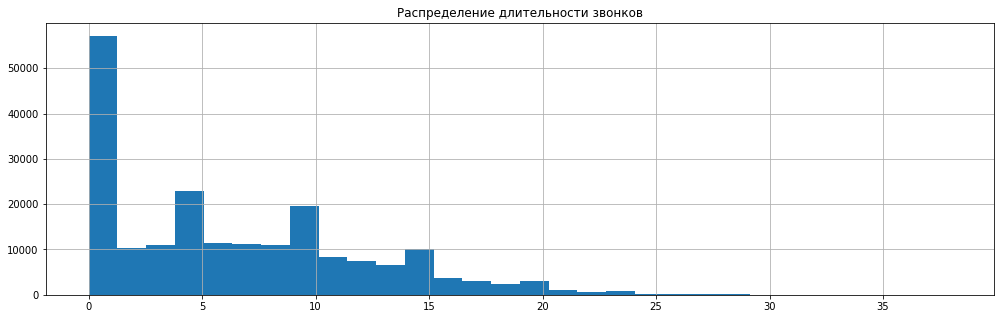

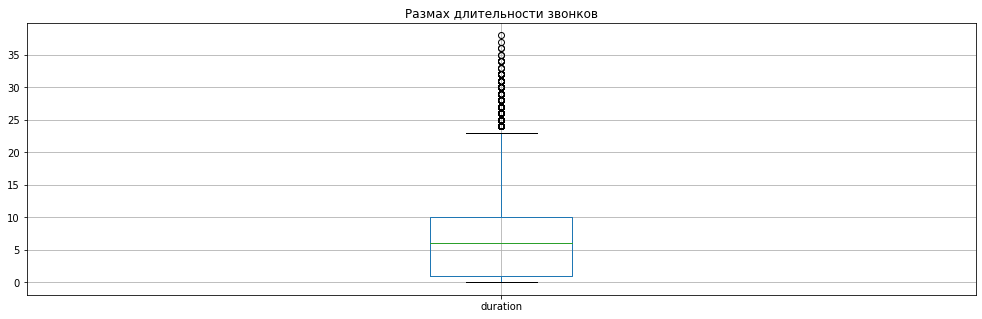

In [24]:
# Посмотрим как распределяется длительность звонков и построим график распределения. 
# Также, с помощью boxplot визуально оценим характеристики распределения.
calls['duration'].hist(bins=30, figsize=(17,5))
plt.title('Распределение длительности звонков')
plt.show()
calls.boxplot('duration', figsize=(17,5))
plt.title('Размах длительности звонков')
plt.show()

В целом длительность звонка составляет 6-8 минут, при этом есть отдельные выбросы. Но больше всего значений сосредоточено на показателе в 0 минут. Возможно, пользователи скидывают звонок не договорив минуту в целях экономии. В условиях двух тарифов обозначена цена за минуту разговора, видимо это вводит пользователей в заблуждение, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Предполагаем, что такие условия округления одинаковые в двух тарифах. 

По условиям оператора длительность звонков всегда округляется в большую сторону до целых минут, а длительность меньше минуты округляется до 1 минуты.

In [25]:
calls['duration'] = calls['duration'].where(calls['duration'] > 1, 1) # Методом where выборочно изменяем значения.
# Перевод в целые числа мы сделали ранее.
# Чтобы не переписывать строки сделаем копию датафрейма calls в calls_new
calls_new = calls.copy()
calls_new.columns = ['id_call','call_date','duration','user_id'] # делаем колонки
calls_new.set_index('user_id', inplace=True) # индексы таблицы по user_id




In [26]:
calls_new.head() # смотрим таблицу

,id_call,call_date,duration
user_id,,,
1000,1000_0,2018-07-25,1
1000,1000_1,2018-08-17,1
1000,1000_2,2018-06-11,2
1000,1000_3,2018-09-21,13
1000,1000_4,2018-12-15,5


#### Интернет-трафик

In [27]:
internet.columns = ['id_session', 'mb_used', 'session_date', 'user_id'] 
# Даем новое название колонке id — id_session, чтобы не путаться в однотипных названиях.


In [28]:
internet['id_session'].value_counts().sort_values(ascending=False).head() # уникальные номера интернет сессий не повторяются

1006_49     1
1174_249    1
1040_298    1
1040_28     1
1413_118    1
Name: id_session, dtype: int64

In [29]:
len(internet['user_id'].unique()) # посчитаем все ли пользователи используют интернет
# 3 человека не используют интернет

497

In [30]:
internet.duplicated().sum() # дубликатов нет

0

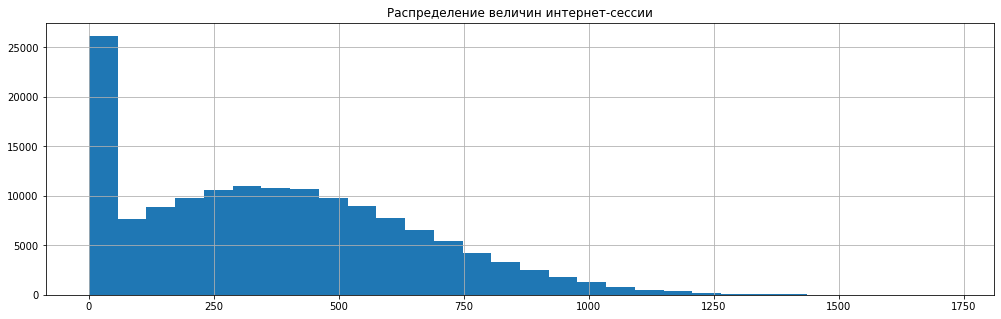

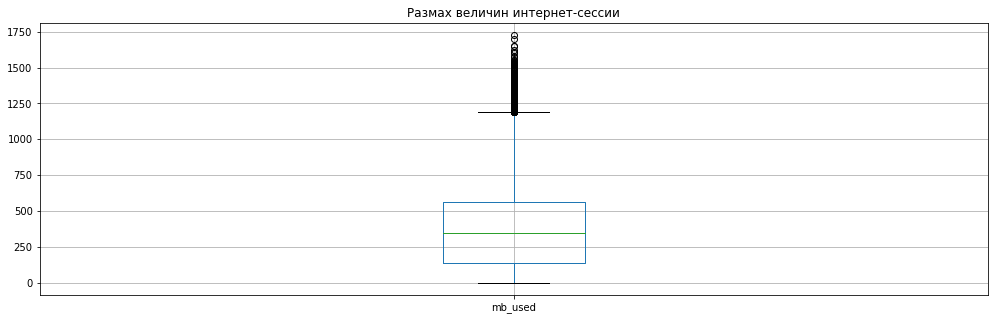

In [31]:
# Посмотрим как распределяется интернет-трафик. 
# Также, с помощью boxplot визуально оценим характеристики распределения.
internet['mb_used'].hist(bins=30, figsize=(17,5))
plt.title('Распределение величин интернет-сессии')
plt.show()
internet.boxplot('mb_used', figsize=(17,5))
plt.title('Размах величин интернет-сессии')
plt.show()

В целом пользователи используют 270 Мбайт трафика, но есть значительная доля интернет-сессий равная 0 Мбайт. Видимо это экономные пользователи.
В любом случае по условиям тарифов значения мегабайтов округляется вверх.

Таким образом, единица тарификации — 1 Мб округленный ввехр, также округляется трафик до 1 Мб.

In [32]:
internet_new = internet.copy() # Делаем копию датафрейма
internet_new['mb_used'] = internet_new['mb_used'].where(internet_new['mb_used'] > 1, 1) #Методом where  изменяем значения.
internet_new['mb_used'] = internet_new['mb_used'].astype('int') # Приводим к целым числам
internet_new.set_index('user_id', inplace=True) # индексы таблицы по user_id


In [33]:
internet_new.head() # Проверяем таблицу


,id_session,mb_used,session_date
user_id,,,
1000,1000_0,112,2018-11-25
1000,1000_1,1052,2018-09-07
1000,1000_2,1197,2018-06-25
1000,1000_3,550,2018-08-22
1000,1000_4,302,2018-09-24


#### Сообщения

In [34]:
messag.columns = ['id_sms', 'message_date', 'user_id'] # Даем название колонкам

In [35]:
messag['id_sms'].value_counts().sort_values(ascending=False).head() # проверяем уникальные значения

1478_317    1
1425_726    1
1418_68     1
1251_842    1
1274_542    1
Name: id_sms, dtype: int64

In [36]:
len(messag['user_id'].unique()) 
# 74 человека не пользуются сообщениями

426

In [37]:
messag.set_index('user_id', inplace=True) # индексы таблицы по user_id

In [38]:
messag.head() # Проверяем

,id_sms,message_date
user_id,,
1000,1000_0,2018-06-27
1000,1000_1,2018-10-08
1000,1000_2,2018-08-04
1000,1000_3,2018-06-16
1000,1000_4,2018-12-05


#### Пользователи

In [39]:
user2.columns = ['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff_name'] 
# Для удобства даем новое название tariff_name

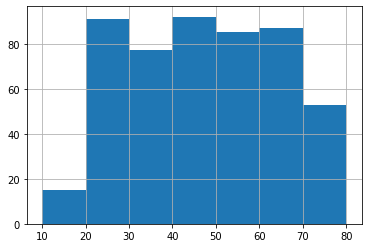

In [40]:
user2['age'].hist(bins=[10,20,30,40,50,60,70,80]) # Посмотрим распределение пользователей по возрасту
plt.show()                 

Услугами оператора в равной степени пользуются люди в возрасте от 20 до 70 лет.

In [41]:
user2['city'].value_counts().head(10) # Посмотрим уникальные значения по городам


москва              99
санкт-петербург     39
новосибирск         16
казань              14
омск                14
уфа                 12
екатеринбург        11
краснодар           11
набережные челны    11
ульяновск           11
Name: city, dtype: int64

Больше всего услуги данного оператора используют в Москве. Возможно это связано с разницей общей численности населения по городам.

In [42]:
user2['tariff_name'].value_counts() # Посмотрим какой тариф используют чаще всего.

smart    351
ultra    149
Name: tariff_name, dtype: int64

Тариф «смарт» ярко выражен у пользователей.

In [43]:
user2.set_index('user_id', inplace=True) # Сделаем уникальный номер пользщователя индексом таблицы

### Вывод

Мы рассмотрели полученные данные и составили приблизительный портрет пользователей. Услугами оператора в равной степени пользуются люди в возрасте от 20 до 70 лет, в целом они совершают звонки длительностью от 4 до 10 минут, а в среднем 6-8 минут. Они используют в среднем 270 Мбайт мобильного интернета. Большая часть клиентов сосредоточена в Москве и большая часть клиентов предмочитают тариф «смарт».



## Месячный расчёт количества сообщений, звонков и интернет-трафика

### Количество звонков и израсходованных минут 

In [44]:
calls_new['month'] = pd.DatetimeIndex(calls_new['call_date']).month # Создаем колонку с месяцем

In [45]:
calls_unity = calls_new.pivot_table(
    index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']
) # Строим сводную таблицу с количеством звонков и их суммарной длительностью каждого пользователя по месяцам



In [46]:
calls_unity.columns = ['calls_number', 'calls_duration'] # Даем название колонкам


### Количество отправленных сообщений

In [47]:
messag['month'] = pd.DatetimeIndex(messag['message_date']).month 

In [48]:
messag_unity = messag.pivot_table(
    index=['user_id', 'month'], values='id_sms', aggfunc='count'
) # Количество сообщений от каждого пользователя по месяцам

In [49]:
messag_unity.columns = ['sms_number']

### Количество израсходованного интернет-трафика

In [50]:
internet_new['month'] = pd.DatetimeIndex(internet_new['session_date']).month 

In [51]:
internet_unity = internet_new.pivot_table(
    index=['user_id', 'month'], values='mb_used', aggfunc=['count', 'sum']
) # Количество сессий и израсходованный трафик по месяцам

In [52]:
internet_unity.columns = ['session_number', 'mb_used']

## Общая таблица
Сведем всю информацию в одну общую таблицу, для удобства в дальнейшей работе.

In [53]:
final_table = internet_unity.join([calls_unity, messag_unity]) # Методом join() склеиваем таблицы кол-во трафика, звонков и сообщений.

In [54]:
final_table.reset_index(inplace=True)

In [55]:
final_table_tariff = final_table.merge(user2, on='user_id') # Объединяем несколько таблиц методом merge(), по уникальному номеру.

In [56]:
final = final_table_tariff.merge(tariffs, on='tariff_name') # Объединяем таблицу с фреймом тарифов по названию тарифа.

In [57]:
final.head() # Проверяем таблицу

,user_id,month,session_number,mb_used,calls_number,calls_duration,sms_number,age,churn_date,city,reg_date,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,5.0,2253.0,22.0,148.0,22.0,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,49.0,23218.0,43.0,160.0,60.0,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,29.0,13989.0,47.0,307.0,75.0,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,29.0,14045.0,52.0,378.0,81.0,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,27.0,14558.0,58.0,436.0,57.0,52,2018-12-31,краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


### Считаем месячную выручку с каждого пользователя

In [58]:
final.columns # Выведем название колонок с которым предстоит работать.

Index(['user_id', 'month', 'session_number', 'mb_used', 'calls_number',
       'calls_duration', 'sms_number', 'age', 'churn_date', 'city', 'reg_date',
       'tariff_name', 'messages_included', 'mg_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute'],
      dtype='object')

- Разница количества использованных сообщений, минут и мегабайт по отношению к количеству включенному в тарифный пакет.

In [59]:
final['total_sms'] = final['sms_number'] - final['messages_included'] # Считаем количесвто сообщений

In [60]:
final['total_minutes'] = final['calls_duration'] - final['minutes_included'] # Считаем количество минут

In [61]:
final['total_mb'] = final['mb_used'] - final['mg_per_month_included'] # Считаем количество мегабайт

In [62]:
final.head() # Проверяем

,user_id,month,session_number,mb_used,calls_number,calls_duration,sms_number,age,churn_date,city,...,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_sms,total_minutes,total_mb
0,1000,5,5.0,2253.0,22.0,148.0,22.0,52,2018-12-31,краснодар,...,1000,30720,3000,1950,150,1,1,-978.0,-2852.0,-28467.0
1,1000,6,49.0,23218.0,43.0,160.0,60.0,52,2018-12-31,краснодар,...,1000,30720,3000,1950,150,1,1,-940.0,-2840.0,-7502.0
2,1000,7,29.0,13989.0,47.0,307.0,75.0,52,2018-12-31,краснодар,...,1000,30720,3000,1950,150,1,1,-925.0,-2693.0,-16731.0
3,1000,8,29.0,14045.0,52.0,378.0,81.0,52,2018-12-31,краснодар,...,1000,30720,3000,1950,150,1,1,-919.0,-2622.0,-16675.0
4,1000,9,27.0,14558.0,58.0,436.0,57.0,52,2018-12-31,краснодар,...,1000,30720,3000,1950,150,1,1,-943.0,-2564.0,-16162.0


После подсчетов в таблице присутсвуют отрицательные значения в количестве использованных сообщений, минут и мегабайт, это связано с тем, что определенные пользователи не превышали лимит предусмотренные тарифным пакетом. Мы замени отрицательные значения на ноль. 

In [63]:
# Для этого воспользуемся методом loc
final.loc[final['total_sms'] < 0, 'total_sms'] = 0
final.loc[final['total_minutes'] < 0, 'total_minutes'] = 0
final.loc[final['total_mb'] < 0, 'total_mb'] = 0


Выручка с одного абонента заключается в сумме месячной стоимость тарифного плана и дополнительных расходов сверх тарифного пакета, предусмотренных тарифом. 

In [64]:
final['overpayment'] = (final['rub_monthly_fee'] + final['total_sms'] * final['rub_per_message'] 
                        + final['total_minutes'] * final['rub_per_minute'] + final['total_mb']/1024 * final['rub_per_gb'])
#Прибавляем к ежемесячной плате количество перерасхода умноженное на стоимость сверх пакета.
# Также, учитываем, что  1 гигабайт = 1024 мегабайта

In [65]:
final['overpayment'] = final['overpayment'].round(0) # округляем значения

In [66]:
final.head() # проверяем. Обнаружены «NaN», в целом это не помешает дальнейшей работе, поэтому преобразовывать «NaN» не будем. 

,user_id,month,session_number,mb_used,calls_number,calls_duration,sms_number,age,churn_date,city,...,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_sms,total_minutes,total_mb,overpayment
0,1000,5,5.0,2253.0,22.0,148.0,22.0,52,2018-12-31,краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,49.0,23218.0,43.0,160.0,60.0,52,2018-12-31,краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,29.0,13989.0,47.0,307.0,75.0,52,2018-12-31,краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,29.0,14045.0,52.0,378.0,81.0,52,2018-12-31,краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,27.0,14558.0,58.0,436.0,57.0,52,2018-12-31,краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


## Анализ данных

Наша задача заключается в сравнении тарифов, поэтому выделим два набора данных для тарифа «Смарт» и тарифа «Ультра»

In [67]:
final_smart = final.query('tariff_name == "smart"') # Делаем срез по тарифу «смарт»

In [68]:
final_ultra = final.query('tariff_name == "ultra"') # Аналогично

### Количество минут разговора

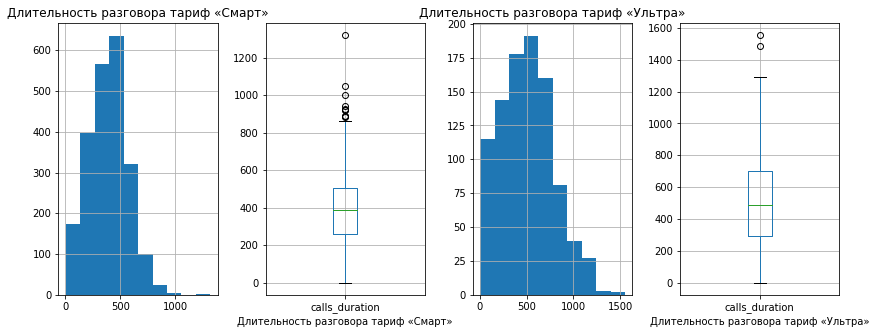

In [69]:
plt.subplots(figsize=(14,5))
plot = final_smart.hist('calls_duration', ax=plt.subplot(1,4,1))
plt.title('Длительность разговора тариф «Смарт»')
plot = final_smart.boxplot('calls_duration', ax=plt.subplot(1,4,2))
plt.xlabel('Длительность разговора тариф «Смарт»')
plot = final_ultra.hist('calls_duration', ax=plt.subplot(1,4,3))
plt.title('Длительность разговора тариф «Ультра»')
plot = final_ultra.boxplot('calls_duration',ax=plt.subplot(1,4,4))
plt.xlabel('Длительность разговора тариф «Ультра»');

Судя по графикам, они слегка скошены вправо, перед нами распределение Пуассона. С учетом округления перед нами дискретная величина и она может принимать целочисленные значения.

Считаем среднее количество, стандартное отклонение и дисперсию. 

In [70]:
# Для удобной записи значений создаем отдельный фрейм
columns=['mean', 'var', 'std']
calculat = pd.DataFrame(columns = columns)

In [71]:
#Пишем функцию.
for data in [['Smart', final_smart['calls_duration']],['Ultra', final_ultra['calls_duration']]]:
    print(data[0])
    print()
    print('Средняя длительность разговора одного пользователя в месяц: {:.0f} мин'.format(data[1].mean()))
    print('Дисперсия: {:.1f}'.format(np.var(data[1])))
    print('Стандартное отклонение: {:.1f}'.format(np.std(data[1])))
    print()
    calculat = calculat.append({
        'mean': data[1].mean(),
        'var': np.var(data[1]),
        'std': np.std(data[1])}, ignore_index=True
    )

Smart

Средняя длительность разговора одного пользователя в месяц: 387 мин
Дисперсия: 30395.8
Стандартное отклонение: 174.3

Ultra

Средняя длительность разговора одного пользователя в месяц: 506 мин
Дисперсия: 79676.6
Стандартное отклонение: 282.3



Пользователи тарифа «Смарт» укладываются в диапазон 250-625 минут разговора. То есть, определнная часть клиентов укладывается в минуты разговора отведенные их тарифом. Некоторые тратят меньше, возможно в целях экономии. Другая часть клиентов использует дополнительные минуты разговора сверх тарифного пакета. 

Пользователи тарифа «Ультра» укладываются в диапазон 200-800 минут разговора. Таким образом, согласно их тарифному плану они не используют большую часть оставшихся минут.

### Количество отправленных сообщений

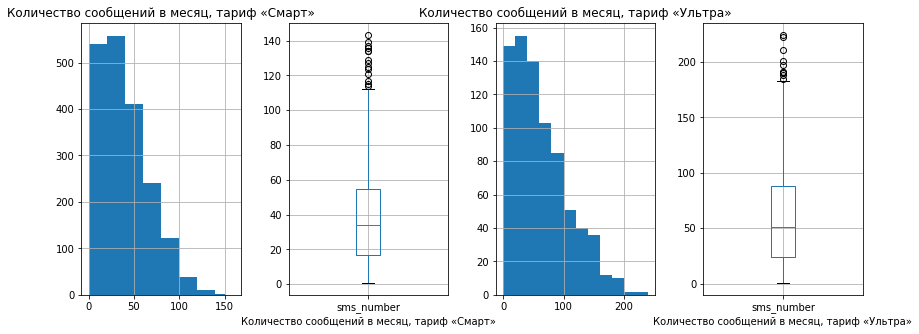

In [72]:
plt.subplots(figsize=(14,5))
plot = final_smart.hist('sms_number', bins=[
    0,20,40,60,80,100,120,140,150,160], ax=plt.subplot(1,4,1))
plt.title('Количество сообщений в месяц, тариф «Смарт»')
plot = final_smart.boxplot('sms_number', ax=plt.subplot(1,4,2))
plt.xlabel('Количество сообщений в месяц, тариф «Смарт»')
plot = final_ultra.hist('sms_number', bins=[
    0,20,40,60,80,100,120,140,160,180,200,220,240], ax=plt.subplot(1,4,3))
plt.title('Количество сообщений в месяц, тариф «Ультра»')
plot = final_ultra.boxplot('sms_number', ax=plt.subplot(1,4,4))
plt.xlabel('Количество сообщений в месяц, тариф «Ультра»');

График демонстрирует распределение Пуассона. Количество отправленных сообщений — это дискретная величина.

In [73]:
for data in [['Smart', final_smart['sms_number']],['Ultra', final_ultra['sms_number']]]:
    print(data[0])
    print()
    print('Среднее количество отправленных сообщений в месяц: {:.0f}'.format(data[1].mean()))
    print('Дисперсия: {:.1f}'.format(np.var(data[1])))
    print('Стандартное отклонение: {:.1f}'.format(np.std(data[1])))
    print()
    calculat = calculat.append({
        'mean': data[1].mean(),
        'var': np.var(data[1]),
        'std': np.std(data[1])}, ignore_index=True
    )
    

Smart

Среднее количество отправленных сообщений в месяц: 39
Дисперсия: 716.9
Стандартное отклонение: 26.8

Ultra

Среднее количество отправленных сообщений в месяц: 62
Дисперсия: 2117.0
Стандартное отклонение: 46.0



Пользователи тарифа «Смарт» в целом отправляют от 10 до 70 сообщений в месяц. Среди этих пользователей есть значительная часть клиентов, которые оплачивают дополнительные сообщения по условиям сверх тарифного пакета.

Пользователи тарифа «Ультра» в целом отправляют от 10 до 110 сообщений в месяц. Среди них есть небольшая часть клиентов отправляющих от 150 до 200 сообщений в месяц. Таким образом, данные пользователи используют эту услугу на 11% и не расходуют предложенный пакет сообщений. 

### Количество израсходованного трафика

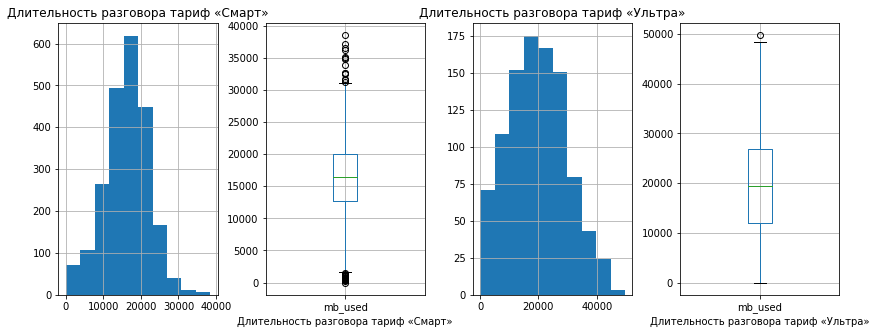

In [74]:
plt.subplots(figsize=(14,5))
plot = final_smart.hist('mb_used', ax=plt.subplot(1,4,1))
plt.title('Длительность разговора тариф «Смарт»')
plot = final_smart.boxplot('mb_used', ax=plt.subplot(1,4,2))
plt.xlabel('Длительность разговора тариф «Смарт»')
plot = final_ultra.hist('mb_used', ax=plt.subplot(1,4,3))
plt.title('Длительность разговора тариф «Ультра»')
plot = final_ultra.boxplot('mb_used',ax=plt.subplot(1,4,4))
plt.xlabel('Длительность разговора тариф «Ультра»');

Данные слегка скошены вправо, гистограмы демонстрируют случайное распределение. Ранее мы округляли значения, поэтому количество трафика в мегабайтах — дискретная величина. 

In [75]:
for data in [['Smart', final_smart['mb_used']],['Ultra', final_ultra['mb_used']]]:
    print(data[0])
    print()
    print('Среднее количество потраченого трафика в месяц: {:.0f}'.format(data[1].mean()))
    print('Дисперсия: {:.1f}'.format(np.var(data[1])))
    print('Стандартное отклонение: {:.1f}'.format(np.std(data[1])))
    print()
    calculat = calculat.append({
        'mean': data[1].mean(),
        'var': np.var(data[1]),
        'std': np.std(data[1])}, ignore_index=True
    )

Smart

Среднее количество потраченого трафика в месяц: 16203
Дисперсия: 34288109.3
Стандартное отклонение: 5855.6

Ultra

Среднее количество потраченого трафика в месяц: 19652
Дисперсия: 98599074.5
Стандартное отклонение: 9929.7



Пользователи тарифа «Смарт» используют примерно 9 - 22 Гб интернет-трафика. При этом значительная часть клиентов превышает лимит (15 Гб) допустимый базовыми условиями тарифа. Таким образом, большая часть пользователей покупает услуги сверх тарифного пакета.

Пользователи тарифа «Ультра» используют примерно 8,7 - 29 Гб интернет-трафика. То есть, они не расходуют полностью предоставленный пакет мобильного интернета. 

### Вывод

Пользователи тарифа «Смарт» укладываются в отведеный лимит времени разговора. Значение 500 минут выглядит наглядно и видимо, зная конкретные ограничения своего тарифа, пользователи ведут себя экономно. Хотя среди них и встречается определнаная часть клиентов оплачивающих дополнительное время. В целом, пользователи данного тарифа склонны опционально докупать услуги сверх таривного пакета: количество сообщений и мобильного интернета. Соответвенно, данным пользователям недостаточно предосталвенного пакета услуг. 

И наоборот, пользователи тарифа «Ультра» не используют весь объем пакета услуг включенного в абоненскую плату. 

Возможно, выгодней для пользователей будет средний тариф между «Смарт» и «Ультра» или тариф-трансформер, услуги которого можно составить самостоятельно. 

На первый взгляд тариф «Смарт» выглядит выгодней для бизнеса, так как пользователи совершают дополнительные покупки. Но у тарифов разная цена. Поэтому необходимо сравнить среднюю выручку по каждому тарифу. 



### Формирование и проверка гипотез

#### Месячная выручка с пользователя по каждому тарифу

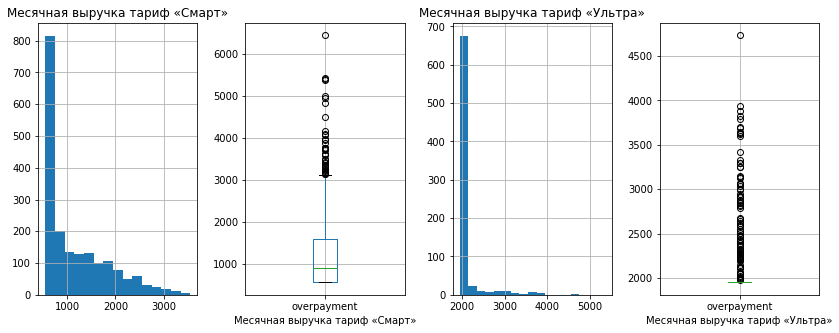

In [76]:
# Строим график и диаграмму размаха по нашей колонке overpayment, в которой выручка с одного абонента 
# Cумма абонетской платы и дополнительных расходов сверх тарифного пакета, предусмотренных тарифом.
plt.subplots(figsize=(14,5))
plot = final_smart.hist('overpayment', bins=[
    550,750,950,1150,1350,1550,1750,1950,2150,2350,2550,2750,2950,3150,3350,3550], ax=plt.subplot(1,4,1))
plt.title('Месячная выручка тариф «Смарт»')
plot = final_smart.boxplot('overpayment', ax=plt.subplot(1,4,2))
plt.xlabel('Месячная выручка тариф «Смарт»')
plot = final_ultra.hist('overpayment', bins=[
    1950,2150,2350,2550,2750,2950,3150,3350,3550,3750,3950,4150,4350,4550,4750,4950,5150,5350], ax=plt.subplot(1,4,3))
plt.title('Месячная выручка тариф «Ультра»')
plot = final_ultra.boxplot('overpayment', ax=plt.subplot(1,4,4))
plt.xlabel('Месячная выручка тариф «Ультра»');


Судя по графикам и распределению месячная выручка в тарифе «Смарт» составляет около 1 500 рублей, а в тарифе «Ультра» около 2 тыс. рублей. Учитывая стоимость тарифа «Смарт» ( 550 рублей), пользователи  совершают дполнительные покупки примерно на 700 рублей. 

Также, учитывая стоимость тарифа «Ультра» (1 950 рублей), при условии месячной выручки в 2 тыс. рублей мы можем сделать вывод, что дополнительный объем услуг, да и большое количество минут/сообщений/трафика остаются невостребованными. При этом, месячная выручка с тарифа «Ультра» значительно больше, чем с тарифа «Смарт».  


Изучим среднее для детального анализа.

In [77]:
for data in [['Smart', final_smart['overpayment']],['Ultra', final_ultra['overpayment']]]:
    print(data[0])
    print()
    print('Среднее выручка с пользователя в месяц: {:.0f}'.format(data[1].mean()))
    print('Дисперсия: {:.1f}'.format(np.var(data[1])))
    print('Стандартное отклонение: {:.1f}'.format(np.std(data[1])))
    print()
    calculat = calculat.append({
        'mean': data[1].mean(),
        'var': np.var(data[1]),
        'std': np.std(data[1])}, ignore_index=True
    )

Smart

Среднее выручка с пользователя в месяц: 1184
Дисперсия: 583005.6
Стандартное отклонение: 763.5

Ultra

Среднее выручка с пользователя в месяц: 2040
Дисперсия: 97706.8
Стандартное отклонение: 312.6



In [78]:
# Взгляним на метрики тарифов — сведем все в одну таблицу для наглядности.
calculat.index = [
    'time_smart', 'time_ultra',
    'message_smart', 'message_ultra',
    'trafic_smart', 'trafic_ultra',
    'overpay_smart', 'overpay_ultra']

In [79]:
calculat # Тарифные метрики

,mean,var,std
time_smart,386.554455,3.039579e+04,174.343897
time_ultra,505.598300,7.967663e+04,282.270486
message_smart,38.736075,7.168533e+02,26.774116
message_ultra,61.587261,2.116999e+03,46.010858
trafic_smart,16202.881508,3.428811e+07,5855.604950
trafic_ultra,19651.975385,9.859907e+07,9929.706670
overpay_smart,1184.228198,5.830056e+05,763.548006
overpay_ultra,2039.699468,9.770683e+04,312.580922


### Гипотеза: «Равенство средней выручки у двух тарифов»

- Нулевая гипотеза: среднее двух выборок равны.
- Обратная гипотеза: среднее двух выборок не равны.

In [80]:
alpha = .05 # Задаем критический уровень статистической значимости

In [81]:
smart_kit = final_smart['overpayment'].dropna().reset_index(drop=True) # Удаляем пропуски в колонке оплаты

In [82]:
ultra_kit = final_ultra['overpayment'].dropna().reset_index(drop=True)

In [83]:
result = st.ttest_ind(
    smart_kit,
    ultra_kit
)

In [84]:
if (result.pvalue < alpha):
    print('Гипотеза не подтверждается')
else:
    print('Гипотеза подтверждается')


Гипотеза не подтверждается


Таким образом, среднее значение выборок не равны, а это значит, что средняя выручка по тарифам различается.

### Гипотеза: «Средняя выручка по клиентам из Москвы равна средней выручке по клиентам других регионов»

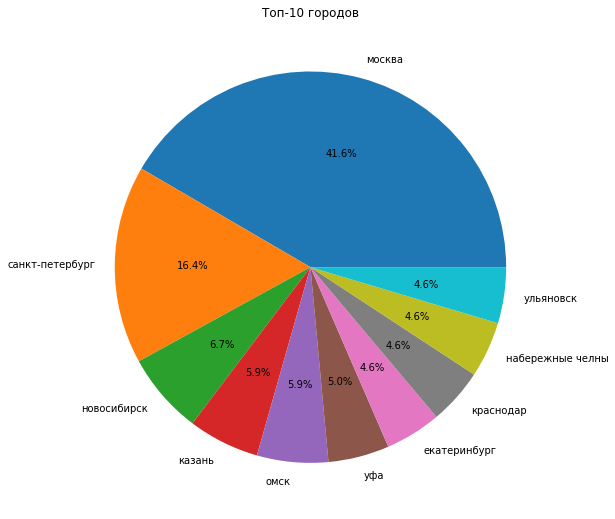

In [85]:
# Строим график с выборкой по 10 основным городам
user2['city'].value_counts().head(10).plot(
    kind='pie',
    title='Топ-10 городов',
    autopct='%.1f%%',
    figsize=(9,9)
)
plt.ylabel('');


In [86]:
# Делаем срез по Москве и другим регионам
city_moscow = final.query('city == "москва"') # Выбираем только Москву
another_city = final.query('city != "москва"') # Выбираем все кроме Москвы

- Нулевая гипотеза: среднее двух выборок равны;
- Обратная гипотеза: среднее двух выборок не равны;

In [87]:
moscow_kit = city_moscow['overpayment'].dropna().reset_index(drop=True)

In [88]:
another_kit = another_city['overpayment'].dropna().reset_index(drop=True)

In [89]:
result_city = st.ttest_ind(
    moscow_kit,
    another_kit)

In [90]:
if (result_city.pvalue < alpha):
    print('Гипотеза не подтверждается')
else:
    print('Гипотеза подтверждается')

Гипотеза не подтверждается


Таким образом, средняя выручка по тарифам в Москве и регионах не одинакова. Выручка зависит от региона. 

### Вывод

Изучив все данные мы пришли к выводу, что пользователям тарифа «Смарт» не достаточно объема предоставляемых услуг тарифного пакета. Поэтому они вынуждены покупать дополнительное количество минут, сообщение и интернет-трафика. Пользователи тарифа «Ультра» не используют весь объем пакета услуг включенного в абоненскую плату, соответвенно в гораздо меньшей степени совершают дополнительные покупки по услугам.  

Месячная выручка в тарифе «Смарт» составляет около 1 500 рублей, а среднея выручка 1184 рублей. Учитывая стоимость тарифа «Смарт» ( 550 рублей), пользователи делают совершают дполнительные покупки примерно на 700 рублей. 

Месячная выручка в тарифе «Ультра» около 2 тыс. рублей, средняя выручка 2040 рублей. Основной объем услуг остается невостребованным. 

При этом, выручка с тарифа «Ультра» значительно больше, чем с тарифа «Смарт», поэтому он выгодней для бизнеса. Это подтверждается статистической значимостью — средняя выручка между двух тарифов не равна. Также, средняя выручка по тарифам в Москве и регионах не одинакова, таким образом, она не зависит от региона. 

